In [20]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행


Saving gan model.PNG to gan model (1).PNG


In [6]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

Saving gan_minmax.PNG to gan_minmax.PNG


In [31]:
import os
import torch
import torchvision
import torch.nn as nn

import torchvision.utils as utils
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
from torchvision import datasets, transforms

In [ ]:
from IPython.display import Image
Image('gan model.PNG', width=500)

In [22]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 30
batch_size = 32

sample_dir = 'samples'
save_dir = 'save'

# Create a directory if not exists
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [23]:
# MNIST dataset
dataset = datasets.MNIST('./data/', download=True, train=True, transform= transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
# Data loader
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

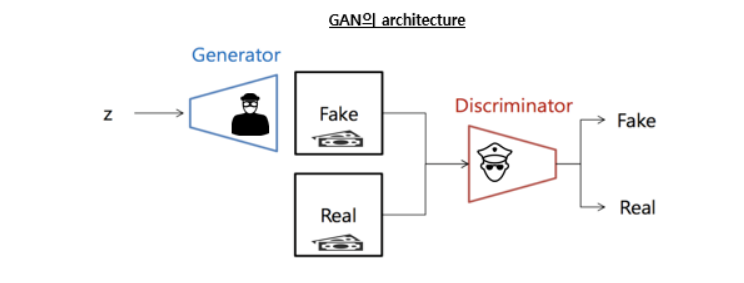

In [7]:
from IPython.display import Image
Image('gan model.PNG', width=500)

In [24]:
# Discriminator
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())
  
# Device setting
D = D.to(device)
G = G.to(device)

In [25]:
# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [26]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()


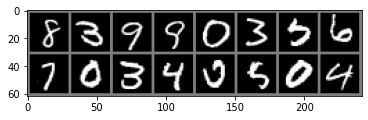

In [33]:
def imshow(img):
    img = (img+1)/2    
    img = img.squeeze()
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

def imshow_grid(img): 
    img = utils.make_grid(img.cpu().detach())
    img = (img+1)/2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
example_mini_batch_img, example_mini_batch_label  = next(iter(data_loader))
imshow_grid(example_mini_batch_img[0:16,:,:])

Epoch [0/30], Step [1800/1875], d_loss: 0.8408, g_loss: 1.2619, D(x): 0.84, D(G(z)): 0.30


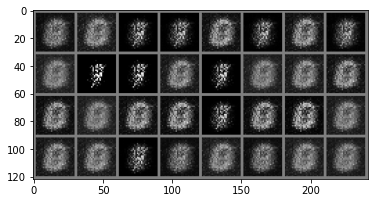

Epoch [1/30], Step [1800/1875], d_loss: 0.0837, g_loss: 5.9719, D(x): 0.98, D(G(z)): 0.05


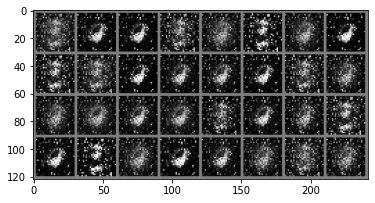

Epoch [2/30], Step [1800/1875], d_loss: 0.1548, g_loss: 6.8803, D(x): 0.91, D(G(z)): 0.00


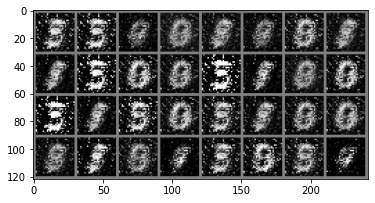

Epoch [3/30], Step [1800/1875], d_loss: 0.1624, g_loss: 5.3386, D(x): 0.89, D(G(z)): 0.01


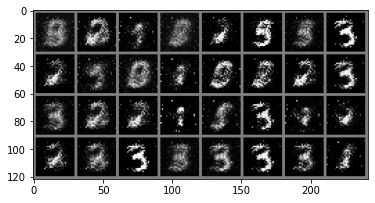

Epoch [4/30], Step [1800/1875], d_loss: 0.4358, g_loss: 4.3257, D(x): 0.90, D(G(z)): 0.20


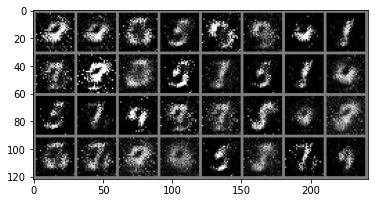

Epoch [5/30], Step [1800/1875], d_loss: 0.4581, g_loss: 3.1821, D(x): 0.82, D(G(z)): 0.04


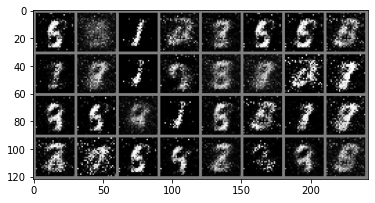

Epoch [6/30], Step [1800/1875], d_loss: 0.4253, g_loss: 2.9643, D(x): 0.94, D(G(z)): 0.21


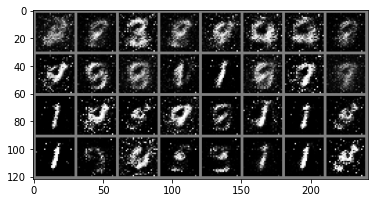

Epoch [7/30], Step [1800/1875], d_loss: 0.4360, g_loss: 5.1443, D(x): 0.84, D(G(z)): 0.13


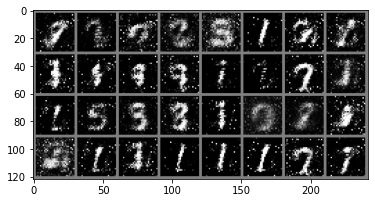

Epoch [8/30], Step [1800/1875], d_loss: 0.3707, g_loss: 4.3468, D(x): 0.85, D(G(z)): 0.08


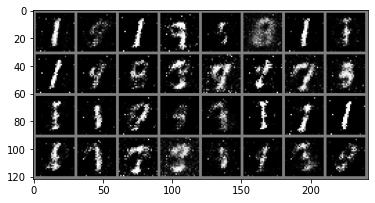

Epoch [9/30], Step [1800/1875], d_loss: 0.3461, g_loss: 4.5067, D(x): 0.86, D(G(z)): 0.02


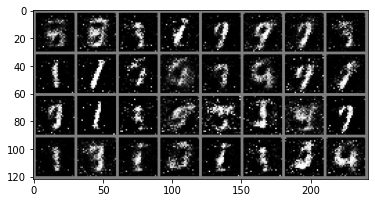

Epoch [10/30], Step [1800/1875], d_loss: 0.5407, g_loss: 2.3346, D(x): 0.79, D(G(z)): 0.14


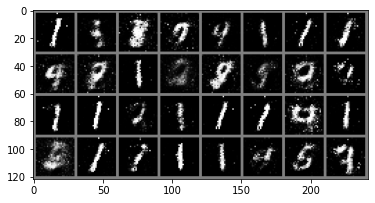

Epoch [11/30], Step [1800/1875], d_loss: 0.4712, g_loss: 2.5716, D(x): 0.84, D(G(z)): 0.17


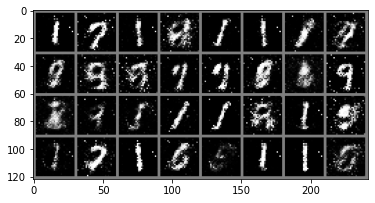

Epoch [12/30], Step [1800/1875], d_loss: 0.5833, g_loss: 3.1704, D(x): 0.81, D(G(z)): 0.14


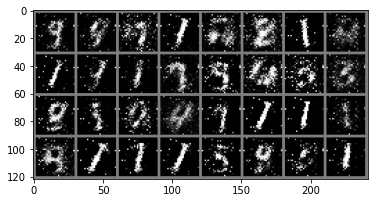

Epoch [13/30], Step [1800/1875], d_loss: 0.6805, g_loss: 3.0528, D(x): 0.84, D(G(z)): 0.26


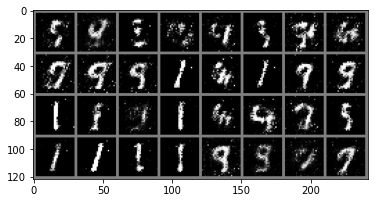

Epoch [14/30], Step [1800/1875], d_loss: 0.6386, g_loss: 3.0320, D(x): 0.78, D(G(z)): 0.20


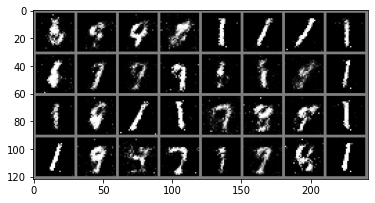

Epoch [15/30], Step [1800/1875], d_loss: 0.4664, g_loss: 2.5997, D(x): 0.81, D(G(z)): 0.11


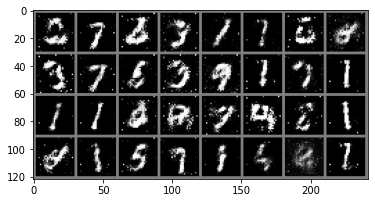

Epoch [16/30], Step [1800/1875], d_loss: 0.2550, g_loss: 4.9963, D(x): 0.95, D(G(z)): 0.12


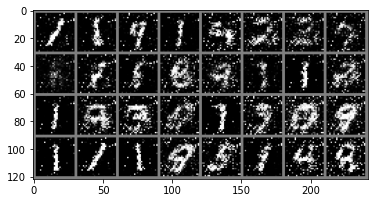

Epoch [17/30], Step [1800/1875], d_loss: 0.6111, g_loss: 2.0621, D(x): 0.84, D(G(z)): 0.26


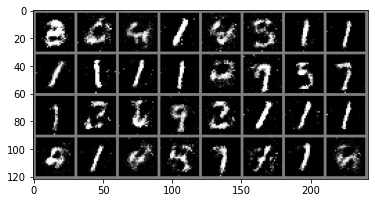

Epoch [18/30], Step [1800/1875], d_loss: 0.6453, g_loss: 2.6043, D(x): 0.70, D(G(z)): 0.16


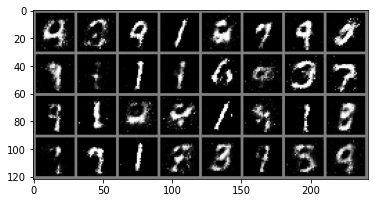

Epoch [19/30], Step [1800/1875], d_loss: 0.6373, g_loss: 2.0885, D(x): 0.85, D(G(z)): 0.29


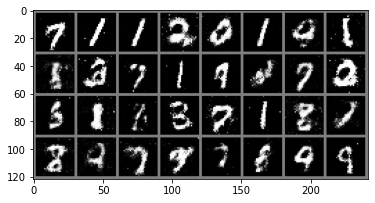

Epoch [20/30], Step [1800/1875], d_loss: 0.6729, g_loss: 2.0117, D(x): 0.87, D(G(z)): 0.33


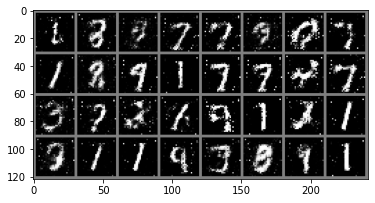

Epoch [21/30], Step [1800/1875], d_loss: 0.8809, g_loss: 2.1412, D(x): 0.73, D(G(z)): 0.27


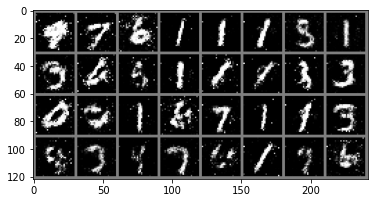

Epoch [22/30], Step [1800/1875], d_loss: 0.7070, g_loss: 2.4823, D(x): 0.75, D(G(z)): 0.20


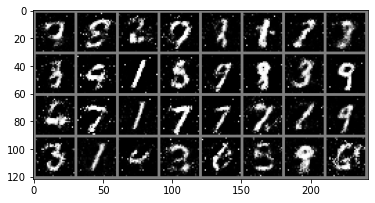

Epoch [23/30], Step [1800/1875], d_loss: 1.1138, g_loss: 1.6088, D(x): 0.76, D(G(z)): 0.40


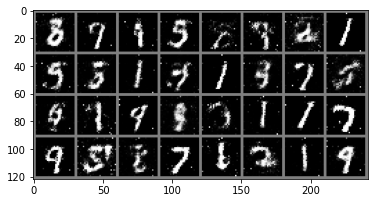

Epoch [24/30], Step [1800/1875], d_loss: 0.6797, g_loss: 1.0829, D(x): 0.89, D(G(z)): 0.34


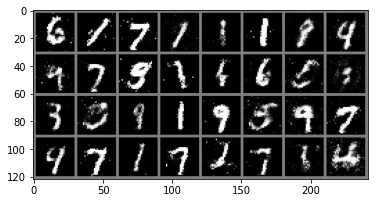

Epoch [25/30], Step [1800/1875], d_loss: 0.6346, g_loss: 2.1468, D(x): 0.74, D(G(z)): 0.15


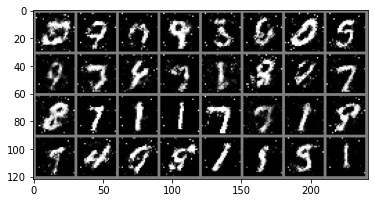

Epoch [26/30], Step [1800/1875], d_loss: 0.7196, g_loss: 2.4438, D(x): 0.73, D(G(z)): 0.19


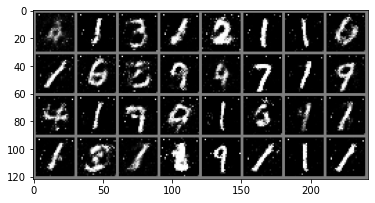

Epoch [27/30], Step [1800/1875], d_loss: 0.8957, g_loss: 2.0420, D(x): 0.78, D(G(z)): 0.33


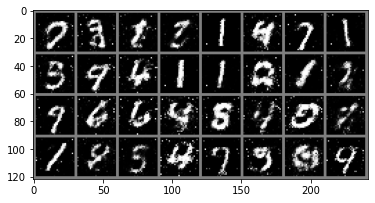

Epoch [28/30], Step [1800/1875], d_loss: 0.6453, g_loss: 1.8143, D(x): 0.91, D(G(z)): 0.35


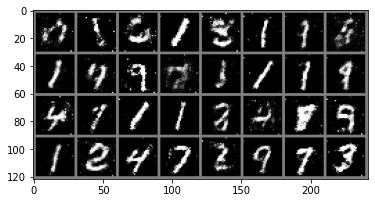

Epoch [29/30], Step [1800/1875], d_loss: 0.7287, g_loss: 1.6920, D(x): 0.68, D(G(z)): 0.16


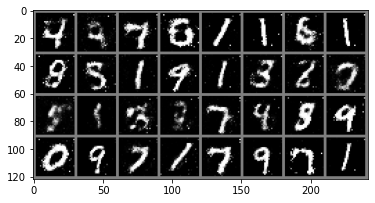

In [34]:
# Start training
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)
        
        # Backprop and optimize
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 1800 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
            imshow_grid(fake_images.view(-1, 1, 28, 28))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 1, 28, 28)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')